In [68]:
# importing packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.pyplot import figure

%matplotlib inline
#setting style and size of the plots
plt.style.use('ggplot')
mpl.rcParams['figure.figsize']=(12,8)

# reading data
df = pd.read_csv('/users/tomekkoszowski/Downloads/movies.csv')

In [69]:
#taking a look at the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [70]:
#looking at data types in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [71]:
#we can see that there missing data in some of the columns
#looking for the percentage of missing data in each column
for col in df.columns:
    pct_missing=np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
    

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [72]:
#removing rows with null values in gross and budget columns
df = df.dropna(subset=['gross', 'budget'])
df = df.reset_index(drop=True)



In [73]:
#changing types of columns
df['budget'] = df['budget'].astype('int')
df['gross'] = df['gross'].astype('int')
df['votes'] = df['votes'].astype('int')

In [74]:
#splitting 'released' column into 2 separated columns: with date (changed do datetime format) and with country
def to_1D(series):
 return pd.Series([x for _list in series for x in _list])
splitted = to_1D(df['released'].str.split('('))
subsetted_date = splitted[::2].reset_index(drop=True)
subsetted_place = splitted[1::2].reset_index(drop=True).str.strip(')')
df['released_date'] = pd.to_datetime(subsetted_date)
df['released_country'] = subsetted_place
df = df.drop(labels=['year', 'released'], axis=1)

df[['name', 'released_date', 'released_country']].head()


,name,released_date,released_country
0,The Shining,1980-06-13,United States
1,The Blue Lagoon,1980-07-02,United States
2,Star Wars: Episode V - The Empire Strikes Back,1980-06-20,United States
3,Airplane!,1980-07-02,United States
4,Caddyshack,1980-07-25,United States


In [75]:
#dropping possible duplicates
df=df.drop_duplicates()

In [76]:
#sorting rows by the highest gross revenue
df=df[['name', 'rating', 'genre', 'score', 'votes', 'released_date', 'gross', 'budget', 'director', 'writer',
       'star', 'country', 'company', 'runtime', 'released_country']]

df=df.sort_values('gross', ascending=False)

Text(0, 0.5, 'billions of dollars')

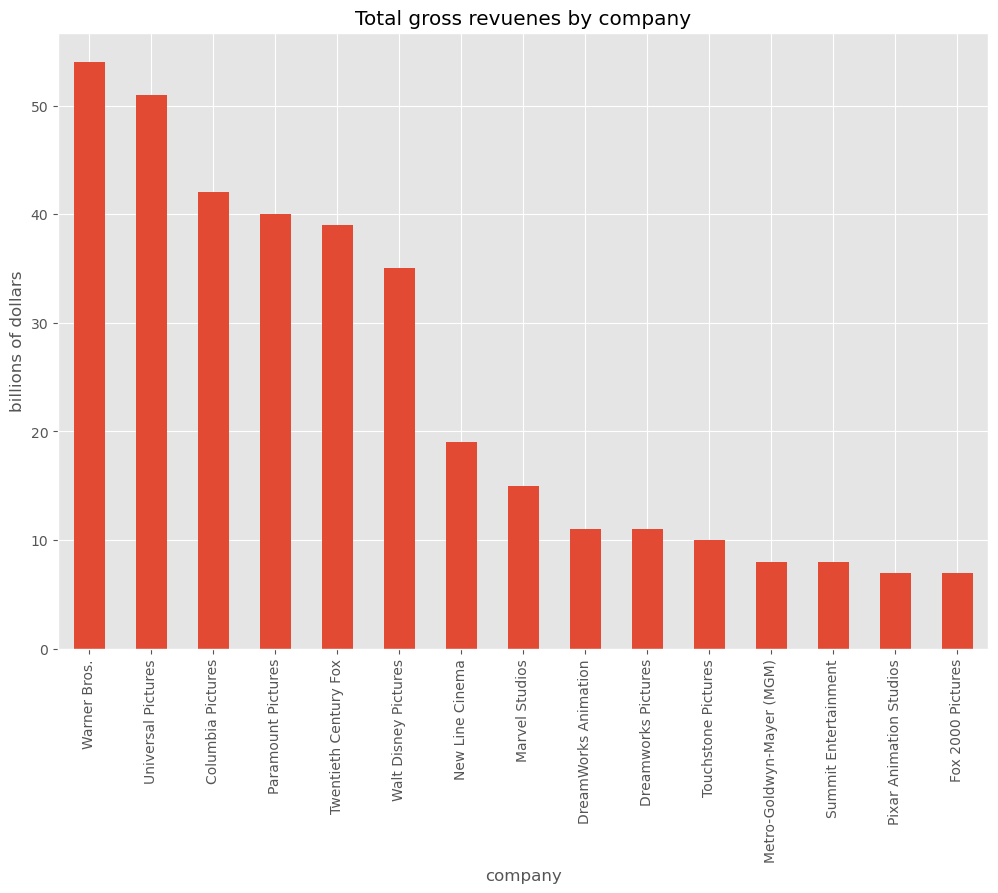

In [77]:
#looking for the company's with highest overall gross
company_total_gross = df.groupby('company')[['gross']].sum()/1000000000
company_total_gross_sorted = company_total_gross.sort_values('gross', ascending=False)
company_total_gross_sorted = company_total_gross_sorted.astype('int')
company_total_gross_sorted_top15 = company_total_gross_sorted[:15]

title = 'Total gross revuenes by company'
ylabel = 'billions of dollars'

fig, ax = plt.subplots()
ax = company_total_gross_sorted_top15.gross.plot.bar(title=title)
ax.set_ylabel(ylabel)



Text(0.5, 1.0, 'Average gross revenue and budget over the years')

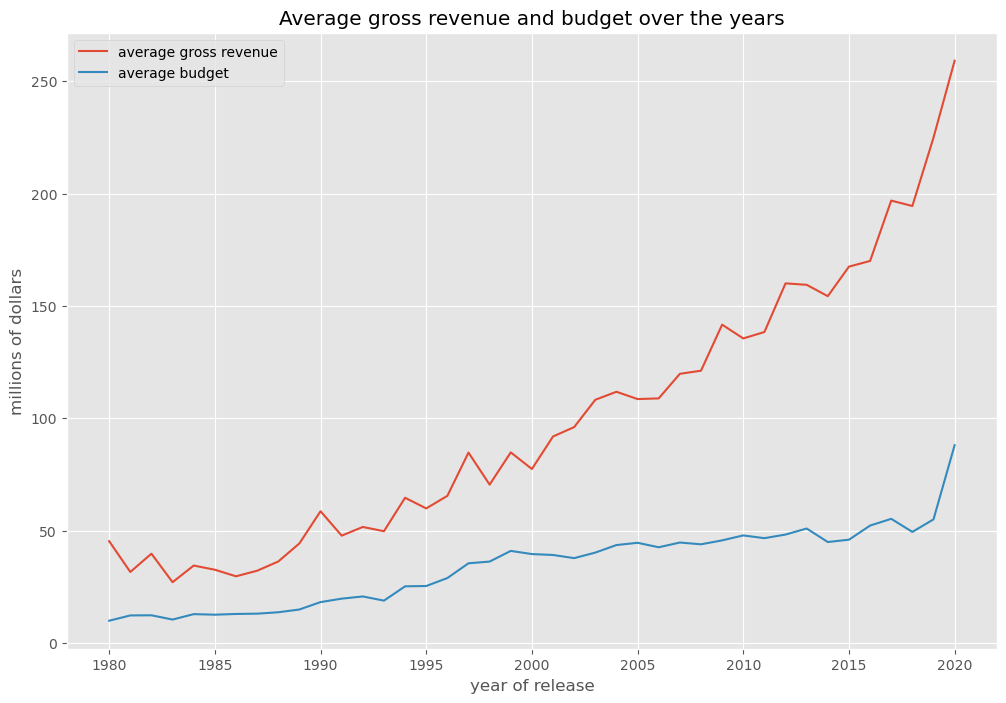

In [78]:
#how movies gross revenue and budget changed over the years
year = np.sort(df['released_date'].dt.year.unique())
avg_gross = df.groupby(df['released_date'].dt.year)['gross'].mean()/1000000
avg_budget = df.groupby(df['released_date'].dt.year)['budget'].mean()/1000000
fig, ax = plt.subplots()
ax.plot(year, avg_gross, label='average gross revenue')
ax.plot(year, avg_budget, label='average budget')
ax.set_xlabel('year of release')
ax.set_ylabel('millions of dollars')
ax.legend()
ax.set_title('Average gross revenue and budget over the years')


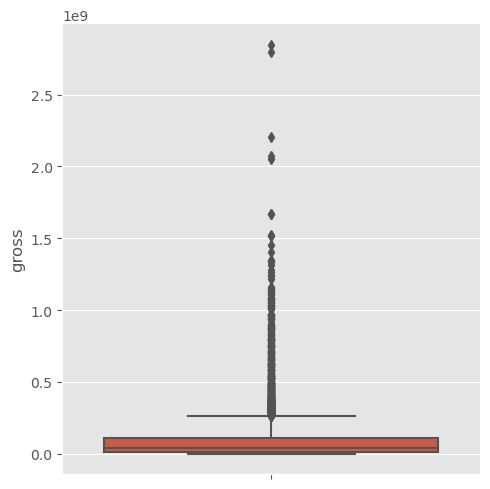

In [79]:
#looking for the outliers
sns.catplot(y='gross', data=df, kind='box')

[Text(0.5, 0, 'film budget'), Text(0, 0.5, 'gross revenue')]

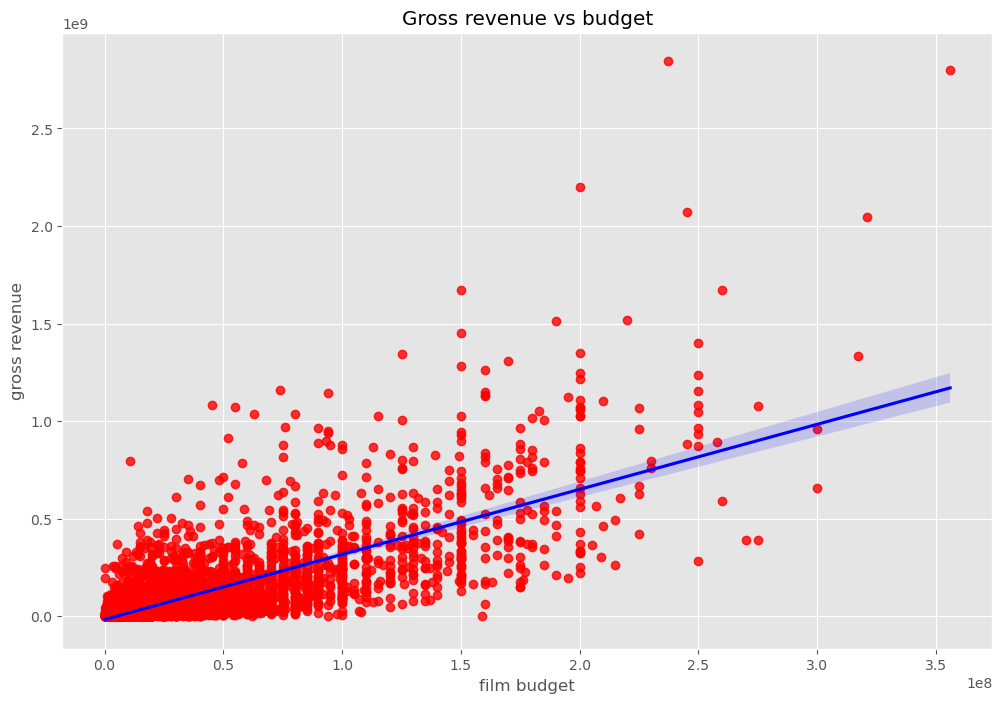

In [80]:
#looking for the corelation between film gross and budget

g=sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color': 'red'}, line_kws={'color': 'blue'})

g.set_title('Gross revenue vs budget')
g.set(xlabel='film budget', ylabel='gross revenue')



[Text(0.5, 0, 'score'), Text(0, 0.5, 'gross revenue')]

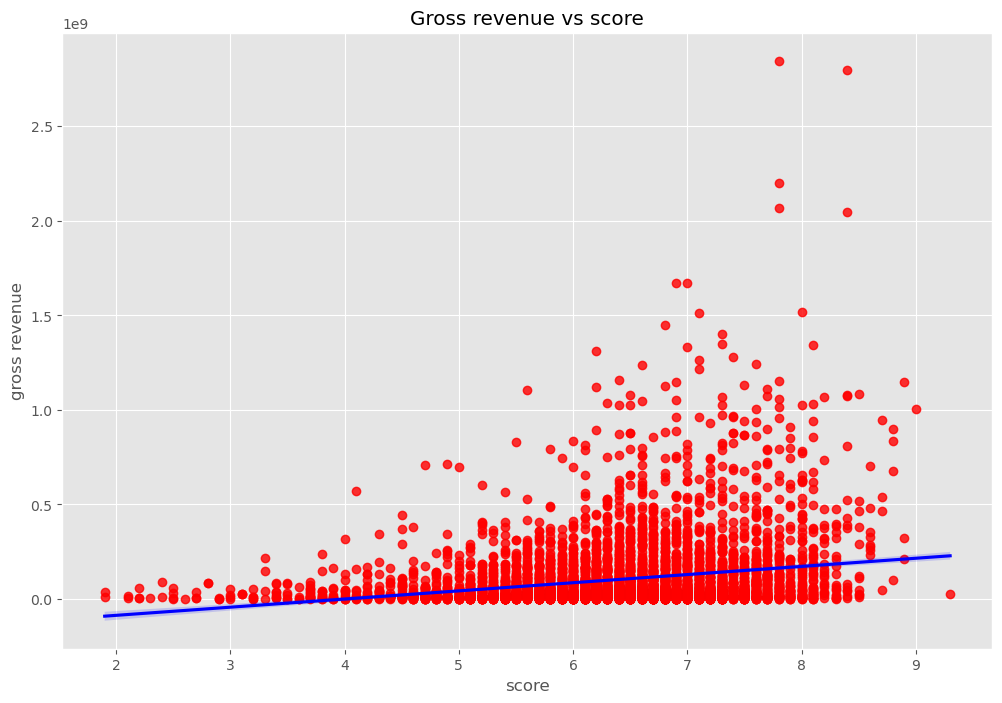

In [81]:
#looking for the corelation between film gross and budget
g=sns.regplot(x='score', y='gross', data=df, scatter_kws={'color': 'red'}, line_kws={'color': 'blue'})

g.set_title('Gross revenue vs score')
g.set(xlabel='score', ylabel='gross revenue')

In [82]:
#looking at the correlation matrix
correlation_matrix = df.corr(method='pearson')
correlation_matrix

,score,votes,gross,budget,runtime
score,1.000000,0.473809,0.222143,0.071792,0.414580
votes,0.473809,1.000000,0.614904,0.440021,0.352437
gross,0.222143,0.614904,1.000000,0.740395,0.275596
budget,0.071792,0.440021,0.740395,1.000000,0.318595
runtime,0.414580,0.352437,0.275596,0.318595,1.000000


[Text(0.5, 58.7222222222222, 'movie feature'),
 Text(120.72222222222221, 0.5, 'movie feature')]

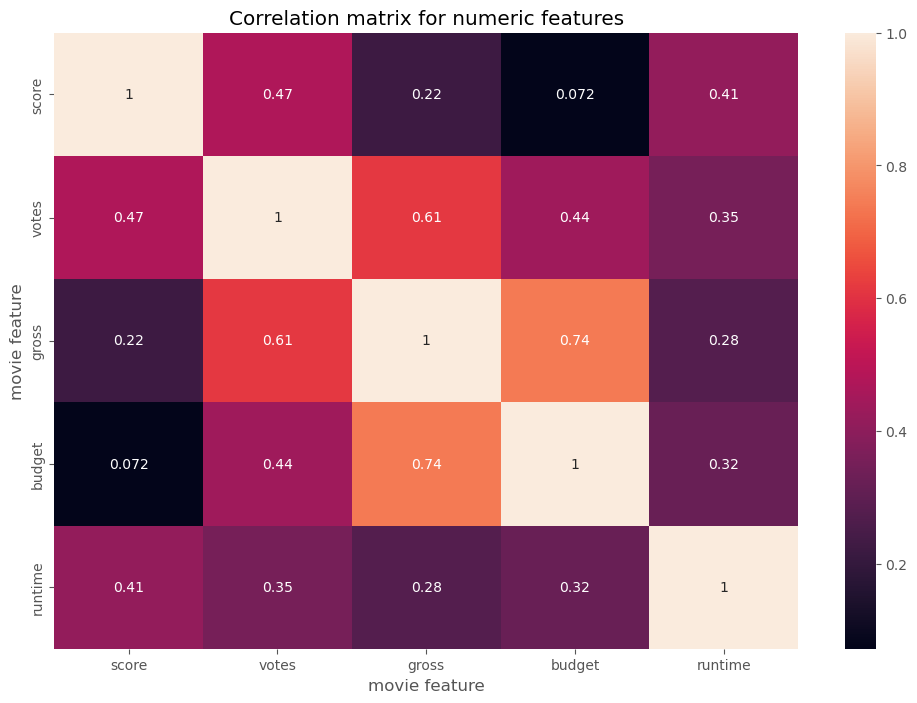

In [83]:
#correlation matrix heatmap
g=sns.heatmap(correlation_matrix, annot=True)

g.set_title('Correlation matrix for numeric features')
g.set(xlabel='movie feature', ylabel='movie feature')